<a href="https://colab.research.google.com/github/akshay190/Akkijain/blob/master/VGG_For_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#For Source Reading
#https://www.kaggle.com/twhitehurst3/stanford-dogs-keras-vgg16
#https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/ 
#https://deeplizard.com/learn/video/stWU37L91Yc
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

553467904/553467096 [==============================] - 15s 0us/step


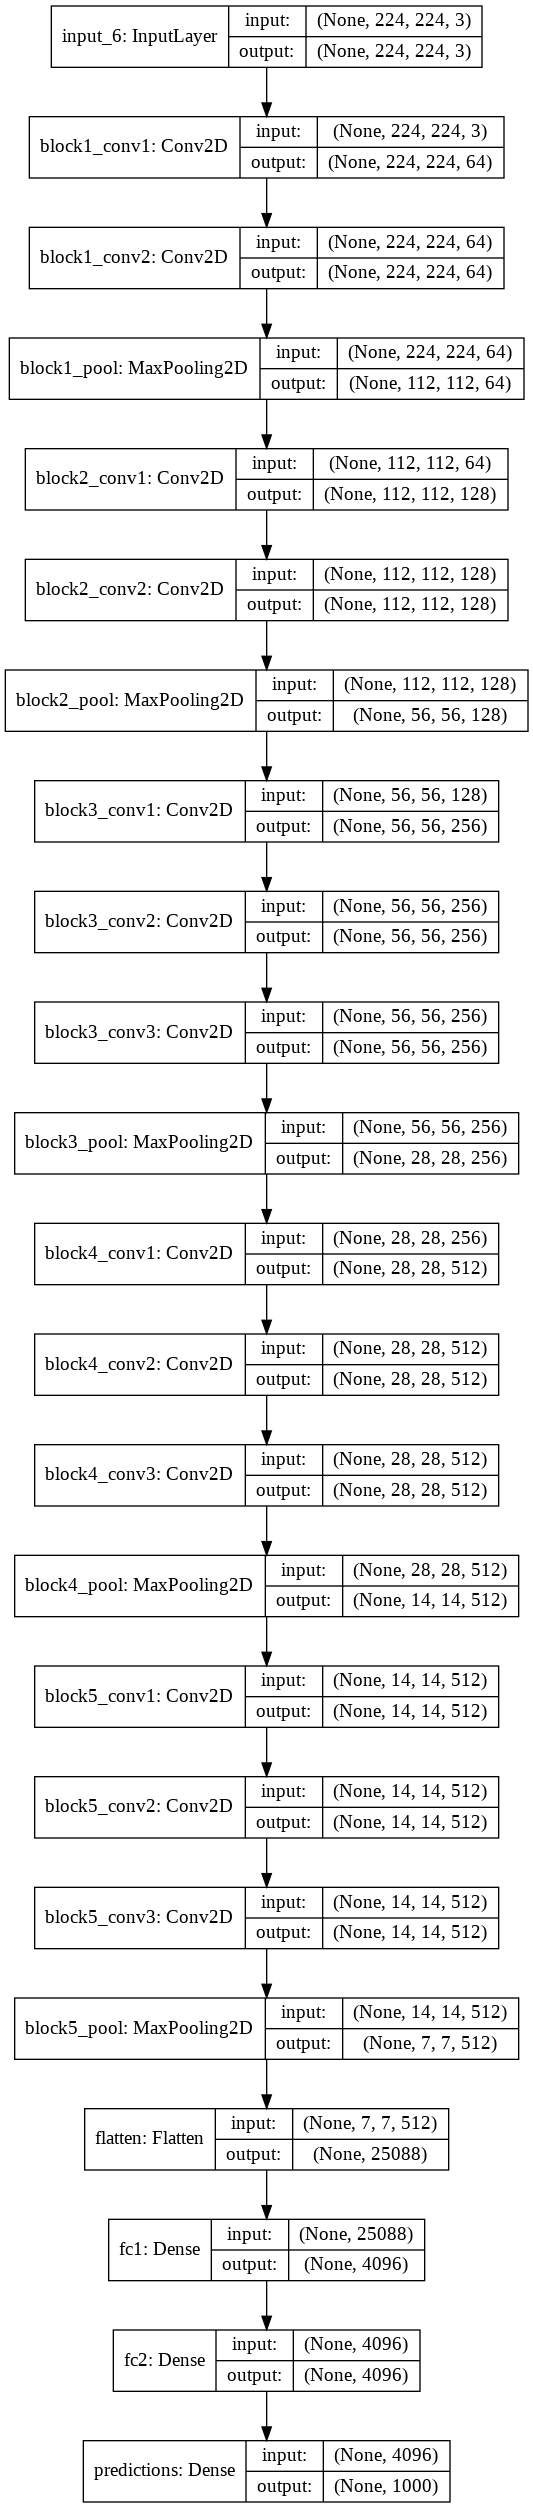

In [0]:
model=VGG16()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)
#print(model.summary())

In [0]:
import keras
model=keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# load the model
model = VGG16(include_top=False, input_shape=(226, 226, 3),weights='imagenet')
for l in model.layers:
    l.trainable=False
flat1 = Flatten()(model.outputs)
class1 = Dense(4096, activation='relu')(flat1)
output = Dense(2622, activation='softmax')(class1)
# define new model
model1 = Model(inputs=model.inputs, outputs=output)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())





58892288/58889256 [==============================] - 2s 0us/step








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 226, 226, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 226, 226, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 226, 226, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
________________________________________________

In [0]:
# load the model
model = VGG16(include_top=False, input_shape=(226, 226, 3),weights='imagenet')
for l in model.layers:
    l.trainable=False
flat1 = Flatten()(model.outputs)
class1 = Dense(4096, activation='relu')(flat1)
output = Dense(2622, activation='softmax')(class1)
# define new model
model2 = Model(inputs=model.inputs, outputs=output)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 226, 226, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 226, 226, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 226, 226, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0 

In [0]:
print(model1.output.shape,model2.output.shape)

(?, 2622) (?, 2622)


In [0]:
for l in model.layers:
    print(l.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten_1
dense_1
dense_2


In [0]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff2dc071b00> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc08f518> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc08f7b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff2dc09c080> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc09e6d8> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc0a5860> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff2dc0ad5c0> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc032f98> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc039e10> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc040cf8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff2dc04c4e0> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc053c50> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc05bd30> False
<keras.layers.convolutional.Conv2D object at 0x7ff2dc063c18> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff2dc06f400>

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print(x_train[1],y_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]] [9]


In [0]:
image=array_to_img(x_train[1])
print(x_train[1].shape)
#print(image)
array=img_to_array(image)
#print(array)
print(x_train[1]==array)

(32, 32, 3)
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


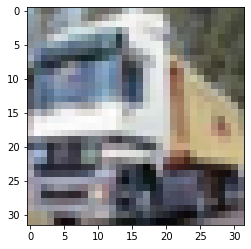

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [0]:
model = VGG16(include_top=False, input_shape=(32, 32, 3),weights='imagenet')
for l in model.layers:
    l.trainable=False
flat1 = Flatten()(model.outputs)
class1 = Dense(250, activation='relu')(flat1)
output = Dense(250, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [0]:
import numpy as np
x1 = np.expand_dims(array, axis=0)
y1=model.predict(x1)

In [0]:
model = VGG16(include_top=False, input_shape=(32, 32, 3),weights='imagenet')
for l in model.layers:
    l.trainable=False
flat1 = Flatten()(model.outputs)
class1 = Dense(250, activation='relu')(flat1)
output = Dense(250, activation='softmax')(class1)
# define new model
model2 = Model(inputs=model.inputs, outputs=output)
print(model2.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [0]:
image2=array_to_img(x_train[2])
print(x_train[2].shape)
#print(image)
array2=img_to_array(image2)
#print(array)
print(x_train[2]==array2)

(32, 32, 3)
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


In [0]:
import numpy as np
x2 = np.expand_dims(array2, axis=0)
y2=model2.predict(x2)

In [0]:
print(y1.shape)
print(y1)
print(y2.shape)
print(y2)

(1, 250)
[[1.43425057e-14 9.37531304e-18 1.25714505e-09 2.04001433e-17
  4.02369457e-12 2.37056791e-18 1.29458459e-28 2.62963706e-21
  4.01455094e-30 2.33854824e-10 2.26687121e-06 3.48770999e-26
  2.02536035e-12 4.77541075e-13 1.53225884e-34 1.61857183e-09
  3.43204215e-06 7.71328459e-08 4.53370781e-26 2.25048083e-12
  5.87008451e-08 4.91578324e-16 1.70813359e-14 5.34782607e-10
  1.09010876e-19 4.95425759e-33 6.46583431e-26 5.53606185e-07
  5.31733910e-08 1.81195254e-22 1.24489735e-24 1.36660057e-16
  2.11621341e-23 1.36088337e-16 4.02570185e-29 1.83038870e-16
  4.66006756e-01 2.46427548e-19 1.07295541e-17 1.55238539e-12
  1.59737918e-13 3.60132648e-22 3.12897320e-20 3.74836620e-11
  6.98951339e-07 1.08564399e-14 2.37725744e-05 1.61334874e-15
  1.26065943e-22 4.48730559e-25 3.33482389e-24 5.81310109e-17
  4.41593340e-25 2.88612043e-13 7.07677059e-12 4.31079634e-08
  2.81068579e-19 1.16727458e-18 1.27005747e-22 1.80559618e-16
  8.00024397e-15 6.95965174e-10 9.69829372e-08 1.98805490e-12

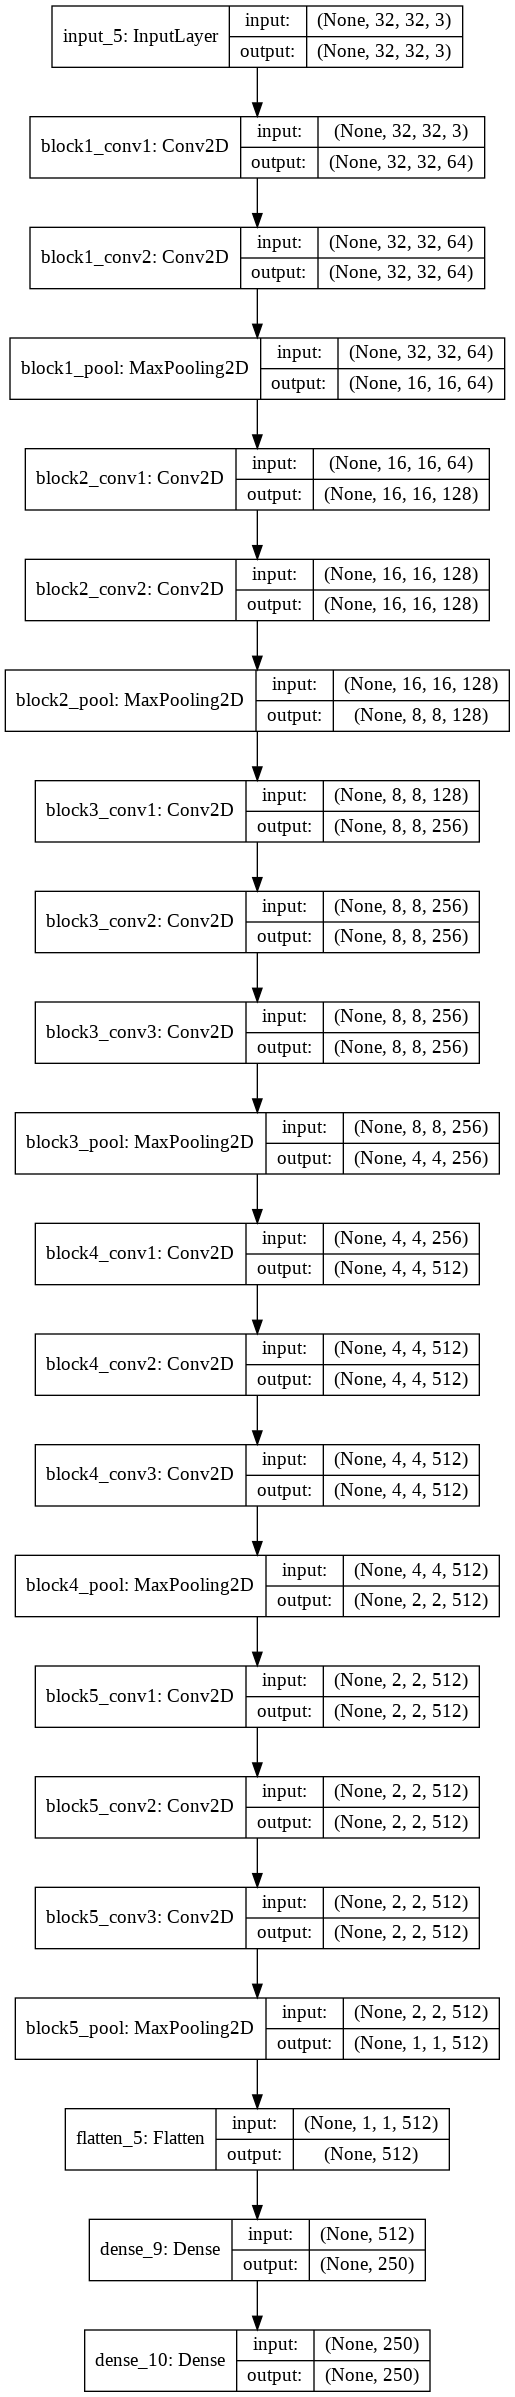

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

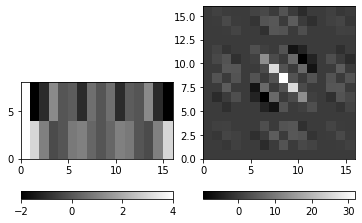

In [0]:
import numpy
from scipy.fftpack import fft,fft2, fftshift
import matplotlib.pyplot as plt
B=numpy.ones((4,4)); W=numpy.zeros((4,4))
signal = numpy.bmat("B,W;W,B")
onedimfft = fft(signal,n=16)
twodimfft = fft2(signal,shape=(16,16))
plt.figure()
plt.gray()
plt.subplot(121,aspect='equal')
plt.pcolormesh(onedimfft.real)
plt.colorbar(orientation='horizontal')
plt.subplot(122,aspect='equal')
plt.pcolormesh(fftshift(twodimfft.real))
plt.colorbar(orientation='horizontal')
plt.show()